This Jupyter Notebook provide a complete example of classical experimental setup for Missing Data studies. The main four steps are (Santos et al. (2019)):
- Data Collection: We used the Breast Cancer Wiscosin from Scikit-learn, which is complete (i.e., without missing values)
- Missing Data Generation: We selected to generate artificial missing data under MNAR mechanism
- Imputation: We performed the imputation by k-Nearst Neighbors (kNN)
- Evaluation: We evaluated the imputation quality with Mean Squared Error (MSE)


In [1]:
## View the version installed
import mdatagen

mdatagen.__version__

'0.1.71'

### Import the libraries

In [2]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_breast_cancer
from sklearn.impute import KNNImputer

from mdatagen.multivariate.mMNAR import mMNAR
from mdatagen.metrics import EvaluateImputation
from mdatagen.plots import PlotMissingData

### Step 1: Data Collection

In [3]:
# Load the data
wiscosin = load_breast_cancer()
wiscosin_df = pd.DataFrame(data=wiscosin.data, columns=wiscosin.feature_names)

X = wiscosin_df.copy()   # Features
y = wiscosin.target    # Label values

### Step 2: Missing Data Generation

In [4]:
# Create a instance with missing rate equal to 20% in dataset under MNAR mechanism
generator = mMNAR(X=X, y=y)

# Generate the missing data under MNAR mechanism
generate_MDdata = generator.random(missing_rate=20,
                                   deterministic=True)

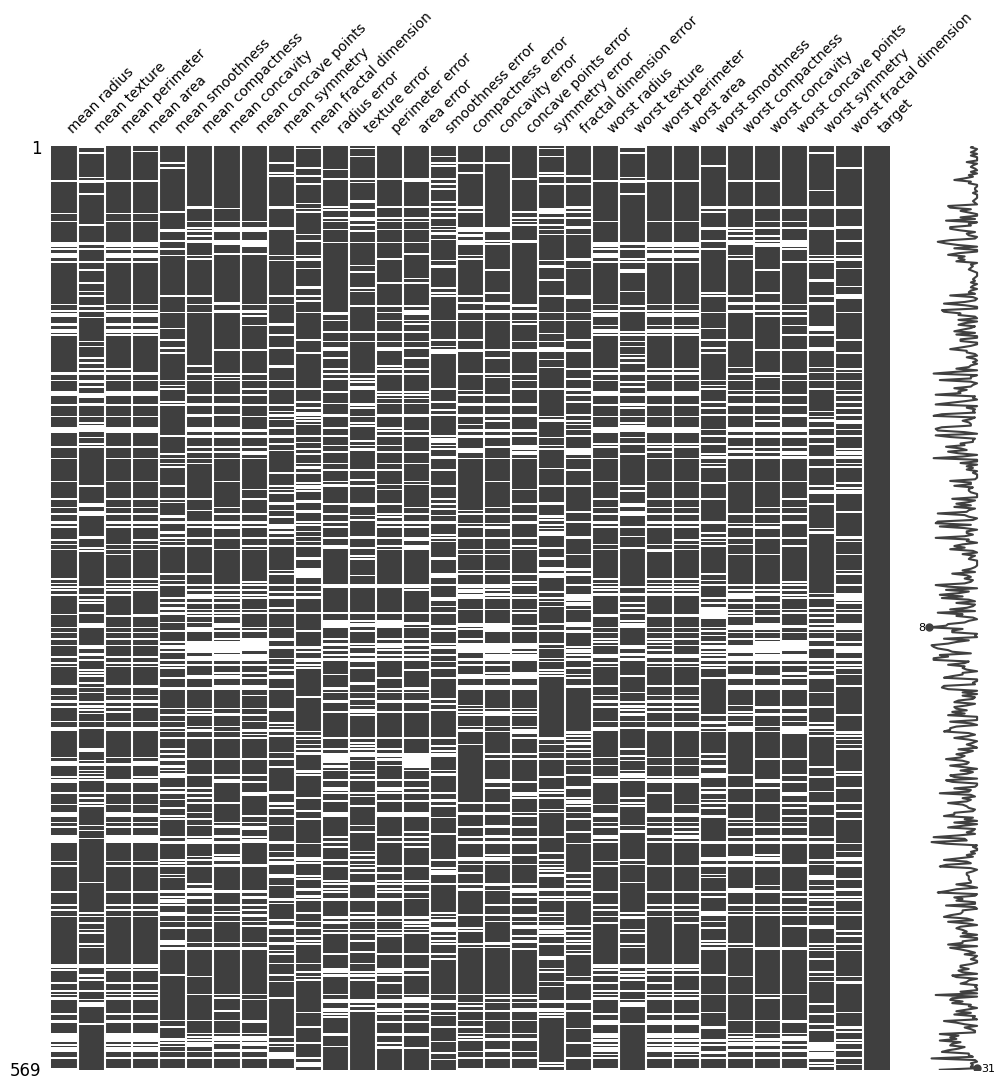

In [5]:
# Visualize the missingness 
miss_plot = PlotMissingData(data_missing=generate_MDdata, 
                            data_original=wiscosin_df)

miss_plot.visualize_miss("normal", save=False)

### Step 3: Imputation

In [17]:
# Initialize the kNN imputer with k=3
imputer = KNNImputer(n_neighbors=3)

# Training the Imputer
imputer.fit(generate_MDdata)

col = X.columns.to_list() # Columns names in result dataframe
col.append("target")

df_imputed = pd.DataFrame(
    imputer.transform(generate_MDdata), columns = pd.Index(col)
)


### Step 4: Evalutation

Measuring the imputation quality, which is the direct evaluation, by Mean Absolute Error (MAE). Here, we calculated the average MAE for each column that has Missing Data. 

In [18]:
df_original = X.copy()
df_original["target"] = y 

maes = []
features = generate_MDdata.columns[
    generate_MDdata.isna().any()
].tolist()

for feature in features:
    missing_id = generate_MDdata.columns.get_loc(feature)
    linhas_nan = generate_MDdata.iloc[:, missing_id][
        generate_MDdata.iloc[:, missing_id].isna()
    ].index

    eval_metric = EvaluateImputation(data_imputed=df_imputed.iloc[linhas_nan, missing_id],
                                    data_original=df_original.iloc[linhas_nan, missing_id],
                                    metric="mean_absolute_error")
    
    mae = eval_metric.show()
    maes.append(mae)

print(f"Average MAE: {round(np.mean(maes),3)} +- {round(np.std(maes),3)}")

Average MAE: 14.796 +- 47.568
